<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/RFM%20and%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score

rfm = pd.read_excel("rfm.xlsx")

In [2]:
rfm.describe()

,recency,frequency,monetary
count,9010.000000,9010.000000,9.010000e+03
mean,403.223196,1.453163,1.530155e+05
std,235.846518,1.158383,2.088286e+05
min,1.000000,1.000000,2.000000e+04
25%,208.000000,1.000000,8.000000e+04
50%,393.000000,1.000000,1.090000e+05
75%,573.000000,2.000000,1.450000e+05
max,1307.000000,29.000000,4.390000e+06


In [3]:
# # Membuat data acak
# x = rfm['recency']  # Assuming 'recency' is the first column
# y = rfm['frequency']  # Assuming 'frequency' is the second column
# z = rfm['monetary']  # Assuming 'monetary' is the third column

# # Membuat figure
# fig = plt.figure(figsize=(15,10))
# ax = plt.axes(projection="3d")

# # Membuat scatter plot
# ax.scatter3D(x, y, z, color="green")
# ax.set_title("Titik Sebaran Data")
# ax.set_xlabel("Recency")
# ax.set_ylabel("Frequency")
# ax.set_zlabel("Monetary")
# plt.savefig("data.png", format='png')
# # Menampilkan plot
# plt.show()

In [4]:
# Standarisasi fitur
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


In [5]:
# Menggunakan len() untuk menghitung jumlah data
jumlah_data = len(rfm_scaled)

print("Jumlah data:", jumlah_data)

Jumlah data: 9010


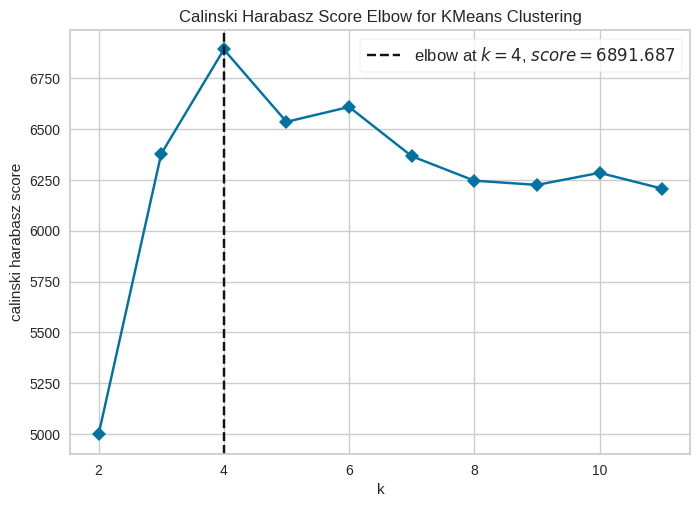

<Figure size 800x550 with 0 Axes>

In [6]:
# from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Ganti X dengan dataset rfm_scaled
X = rfm_scaled

# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.savefig("CH.png", format='png')

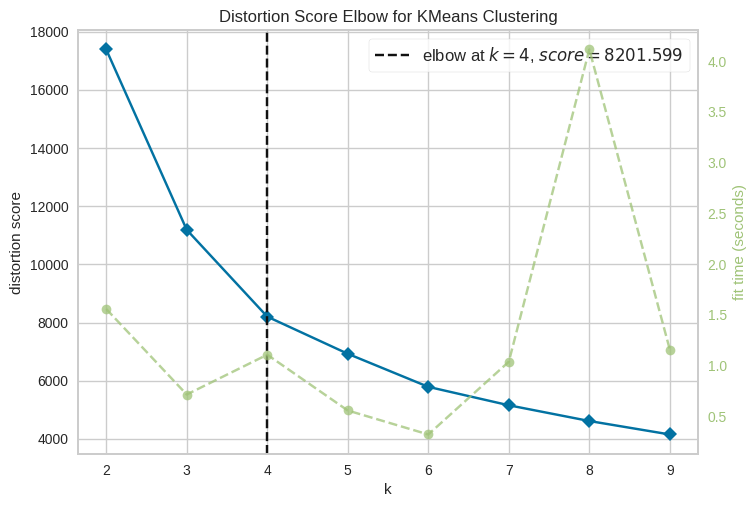

<Figure size 800x550 with 0 Axes>

In [7]:
from yellowbrick.cluster.elbow import kelbow_visualizer

X = rfm_scaled

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=0, n_init=10), X, k=(2,10))
plt.savefig("elbow.png", format='png')

In [8]:
# from yellowbrick.cluster import SilhouetteVisualizer
# # Instantiate the clustering model and visualizer
# model = KMeans(4, random_state=42, n_init=10)
# visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figur

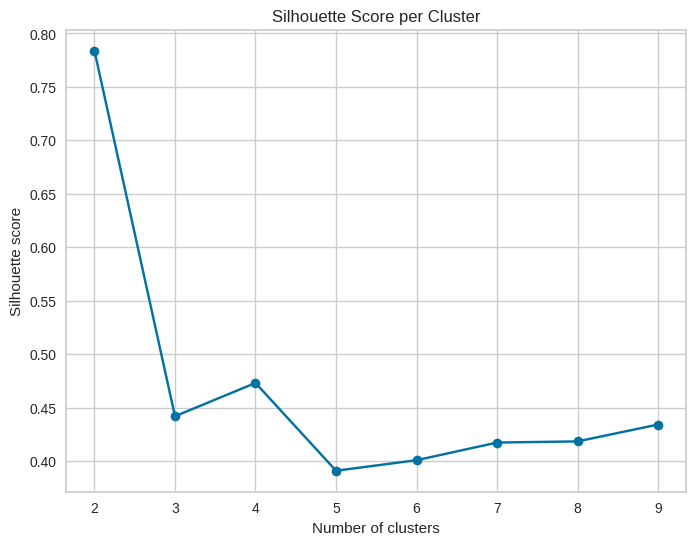

In [9]:
cluster_range = range(2, 10)
# List to store silhouette scores
silhouette_scores = []

for n_clusters in cluster_range:
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = clusterer.fit_predict(rfm_scaled)

    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plotting the silhouette scores per cluster number
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score per Cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

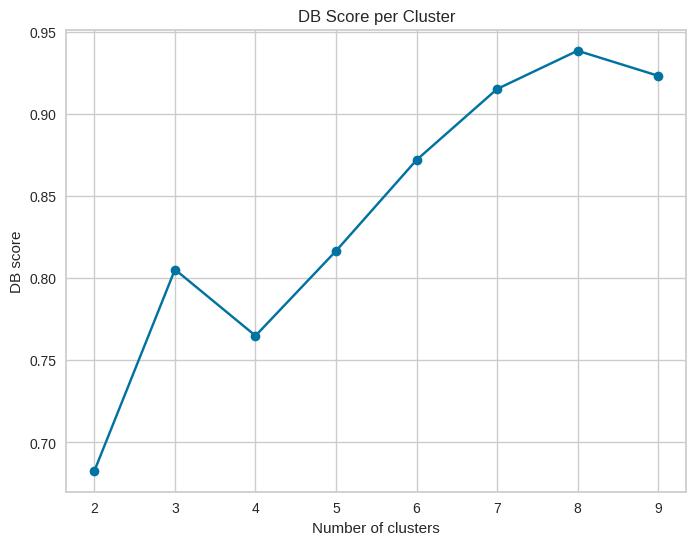

In [10]:
from sklearn.metrics import davies_bouldin_score
cluster_range = range(2, 10)
# List to store silhouette scores
davies_bouldin_scores = []

for n_clusters in cluster_range:
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = clusterer.fit_predict(rfm_scaled)

    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    db_sc = davies_bouldin_score(rfm_scaled, cluster_labels)
    davies_bouldin_scores.append(db_sc)
    # print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plotting the silhouette scores per cluster number
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title('DB Score per Cluster')
plt.xlabel('Number of clusters')
plt.ylabel('DB score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(rfm_scaled)

labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

print("Labels:", labels)
print("Cluster Centers:", cluster_centers)

Labels: [0 3 4 ... 3 0 3]
Cluster Centers: [[ 0.15599735 -0.22442865 -0.17463309]
 [-0.03650057  1.99175703  1.49020746]
 [ 0.18626489  6.68090598  8.33017368]
 [-1.01771545 -0.18841147 -0.2266886 ]
 [ 1.3977984  -0.22499832 -0.14299665]]


In [12]:
cluster_counts = Counter(labels)

print(cluster_counts)

Counter({0: 3178, 3: 3167, 4: 1958, 1: 634, 2: 73})


In [13]:
km_ss = silhouette_score(rfm_scaled, labels)
km_db = davies_bouldin_score(rfm_scaled, labels)
print("K-Means Silhouette Score: ", km_ss)
print("K-Means Davies-Bouldin Score: ", km_db)

K-Means Silhouette Score:  0.3910172407503713
K-Means Davies-Bouldin Score:  0.8166731581326016


In [14]:
n_cluster = 5  # Misalnya, jumlah cluster yang diinginkan
# Membuat label_mapping secara otomatis
label_mapping = {i: f'Cluster {i+1}' for i in range(n_cluster)}
# Ubah label dengan mapping yang telah dibuat
new_labels = [label_mapping[label] for label in labels]

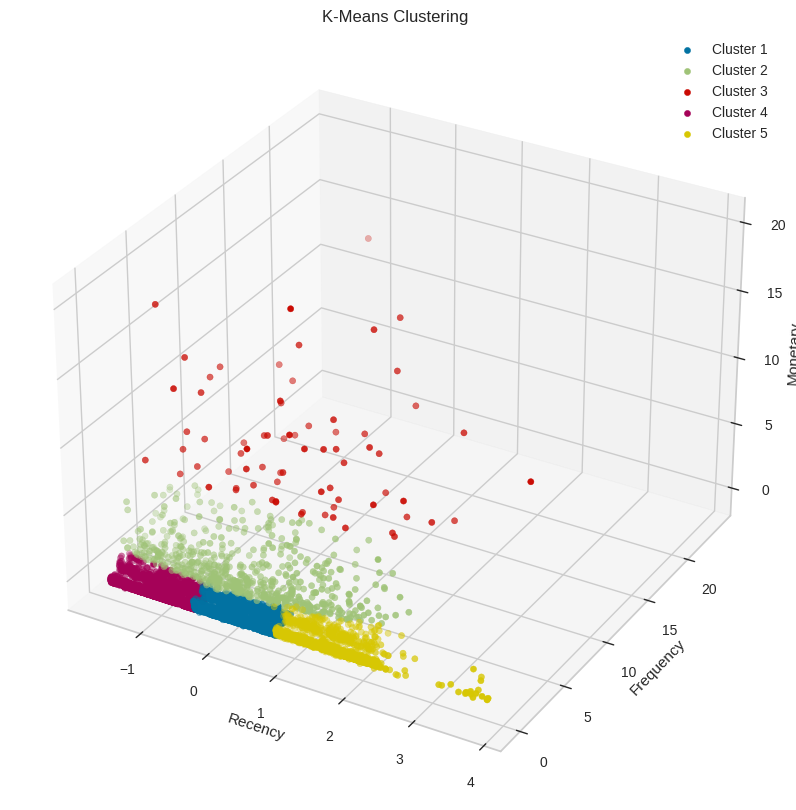

In [15]:
# Membuat figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Membuat scatter plot untuk setiap cluster
for i in range(max(labels)+1):
    filtered_label_i = rfm_scaled[labels == i]
    ax.scatter(filtered_label_i[:,0], filtered_label_i[:,1], filtered_label_i[:,2], label=label_mapping[i])

ax.set_title('K-Means Clustering')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.savefig("cluster.png", format='png')
plt.show()


In [16]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.to_excel('rfm standarisasi.xlsx', index=False)

In [17]:
rfm_scaled['Cluster']=labels
clustered=rfm_scaled
clustered.to_excel('clustered.xlsx',index=False)